In [90]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model as lm

import random

import scipy.stats as stats

%matplotlib inline

In [2]:
auto = pd.read_csv('data/auto.csv',na_values='?').dropna()

statsmodel package has a better function to output summary as R. If to use sklearn, you need to output intercept, coefficient, R square and etc individually. But sklearn is more friendly for cross validation process. 

In [65]:
slrauto = smf.ols('mpg~horsepower',auto).fit()
ypred = slrauto.predict()
slrauto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           7.03e-81
Time:                        12:50:41   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
xsingle=pd.DataFrame({'horsepower':[98]})
ysinglepred = lrauto.get_prediction(xsingle)
print(ysinglepred.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


In [ ]:
1.The summary shows there is a significant correlation 
between the predictor and response according to F-statistic. 
The R square is 0.606 which means 61% of the variability for MPG can be explained by horsepower.

2. Mean_ci_lower and upper indicates the boundary of confidence interval and
obs_ci_lower and obs_ci_upper indicates the boundary of prediction interval

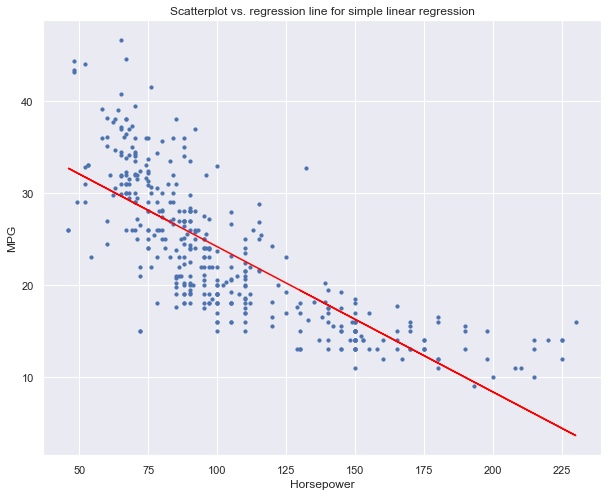

In [59]:
x=auto['horsepower']
y=auto['mpg']
plt.scatter(x,y,s=10)
plt.plot(x,ypred,color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Scatterplot vs. regression line for simple linear regression')
plt.show()

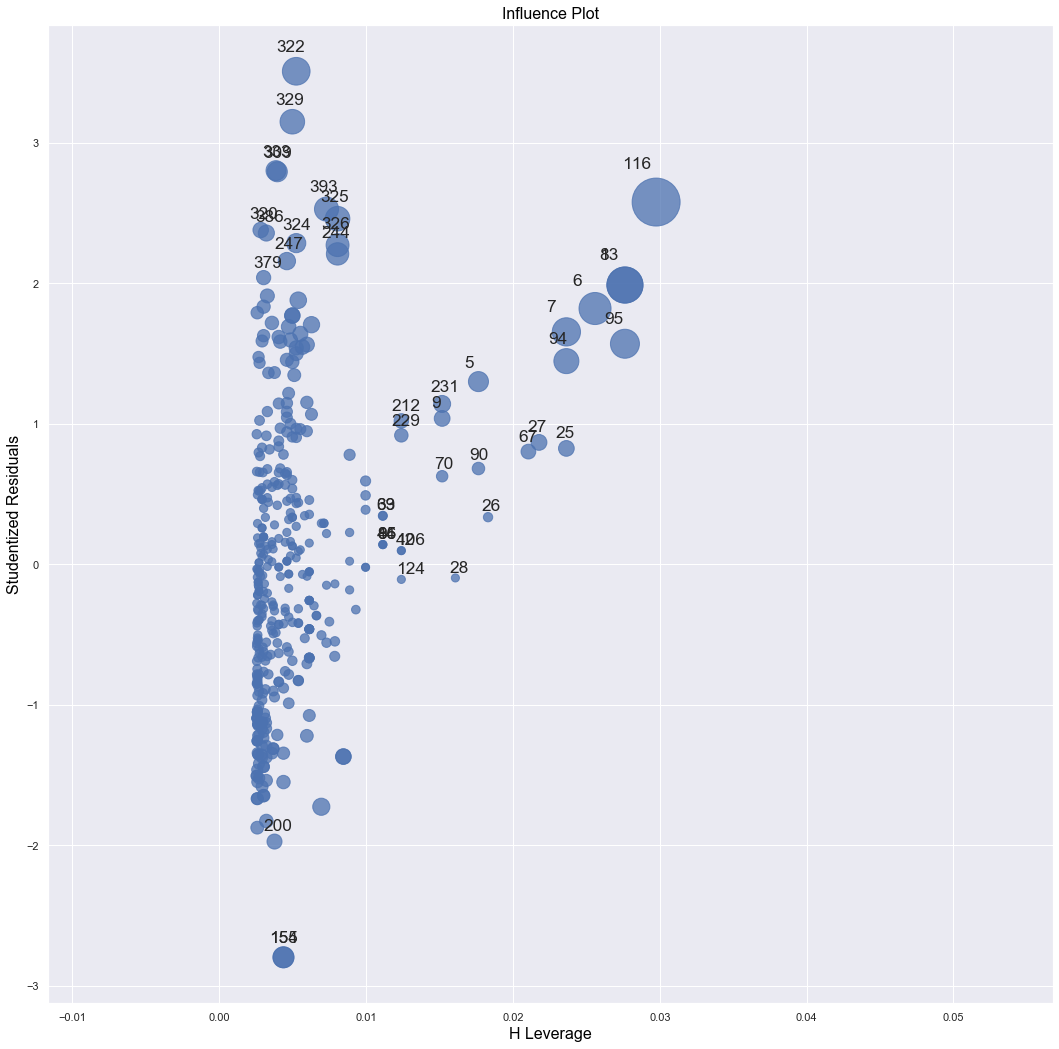

In [60]:
fig, ax = plt.subplots(figsize=(18,18))
fig = sm.graphics.influence_plot(slrauto, ax=ax,criterion="cooks")

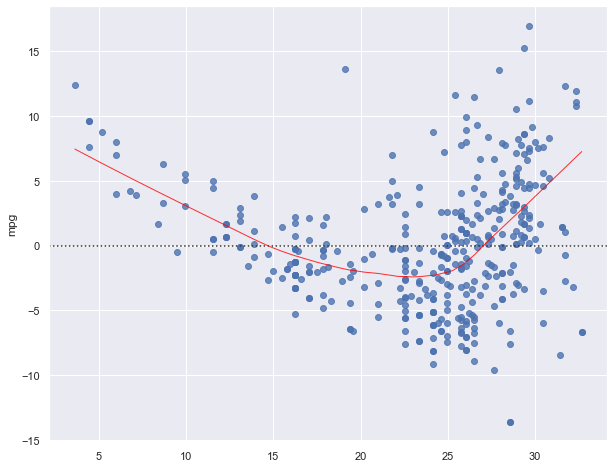

In [61]:
#regress y on x then draw a scatterplot of the residuals.
model_fitted_y = slrauto.fittedvalues
sns.residplot(model_fitted_y,'mpg',data=auto,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

The plots indicates the presence of a bunch of high leverage points and outliers and there is a lack of linearity between horsepower and mpg.

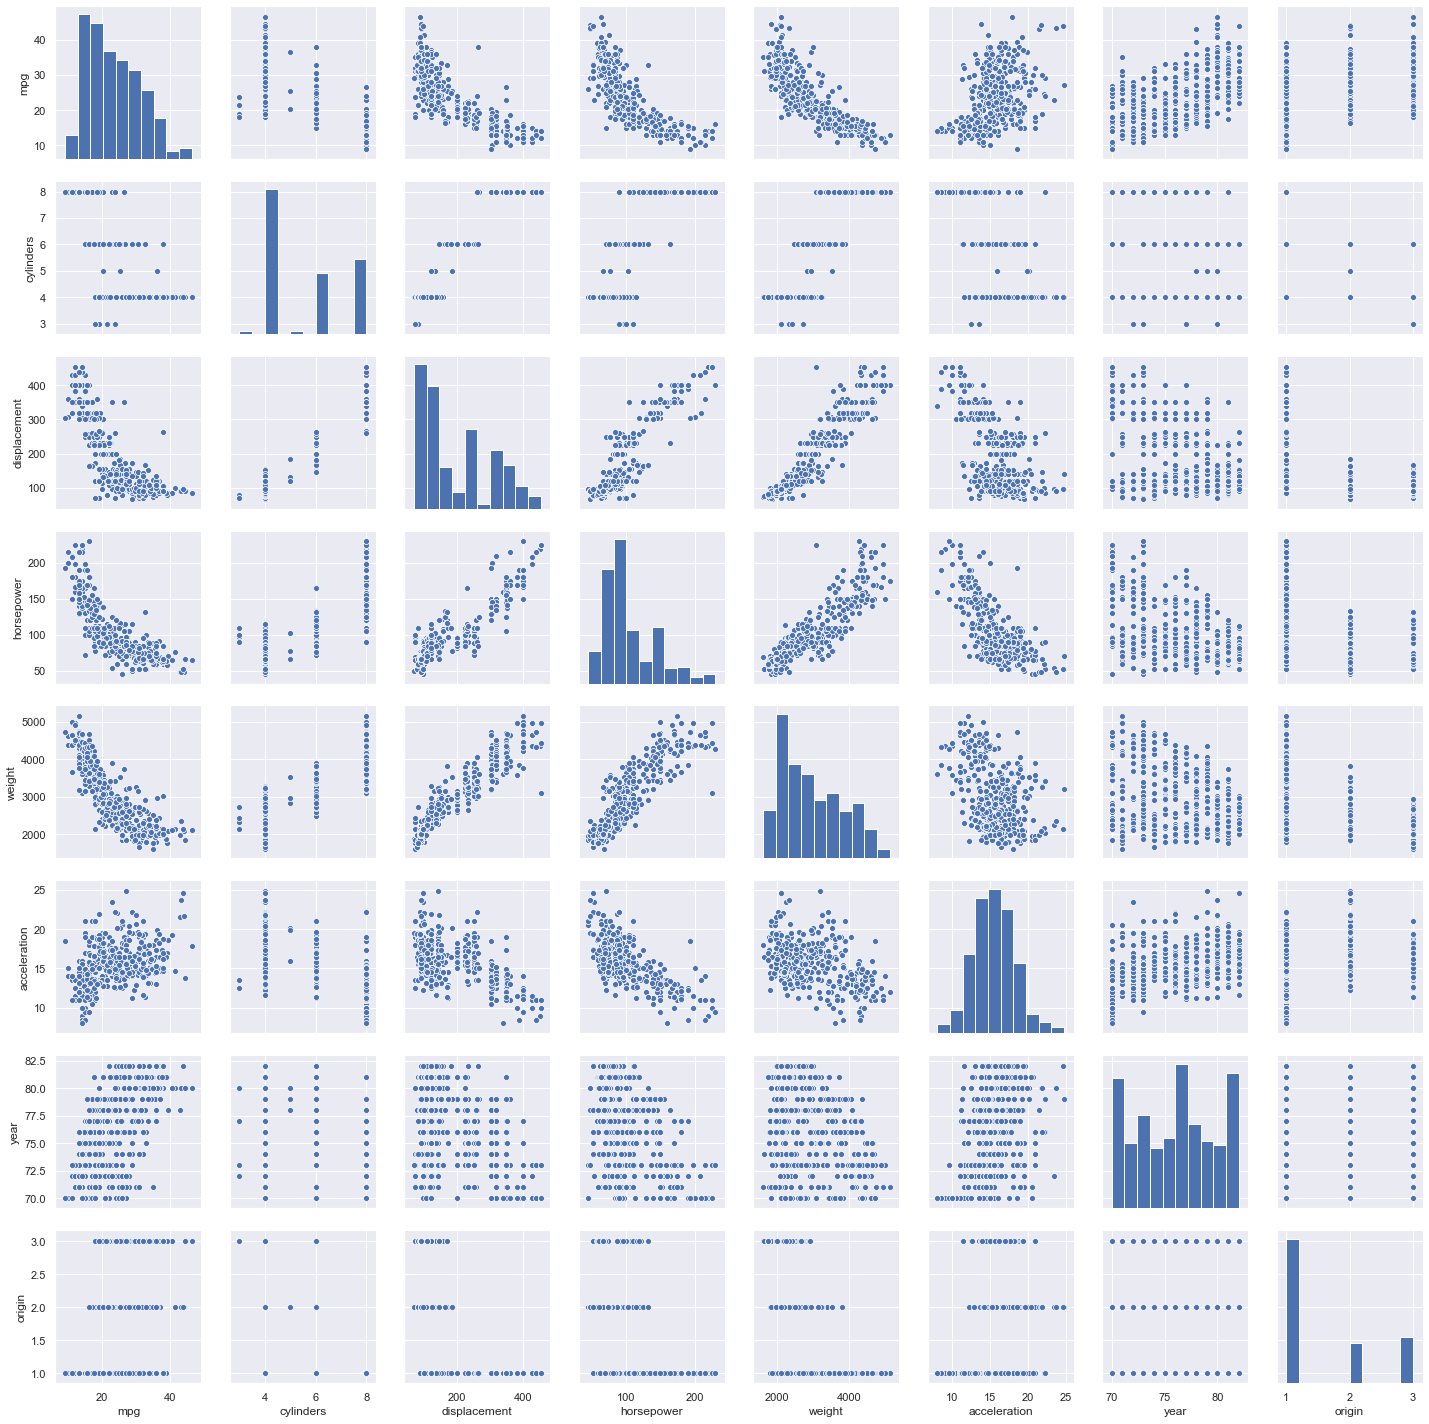

In [51]:
sns.pairplot(auto)

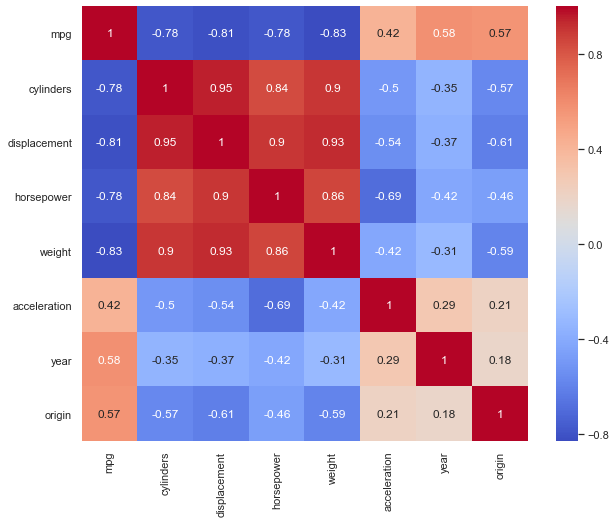

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data = auto.corr().round(2),annot=True,cmap='coolwarm')

In [62]:
x=auto.drop(columns=['name','mpg'])
x=sm.add_constant(x)
y=auto['mpg']
mlrauto = sm.OLS(y,x)
mlr = mlrauto.fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        12:43:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

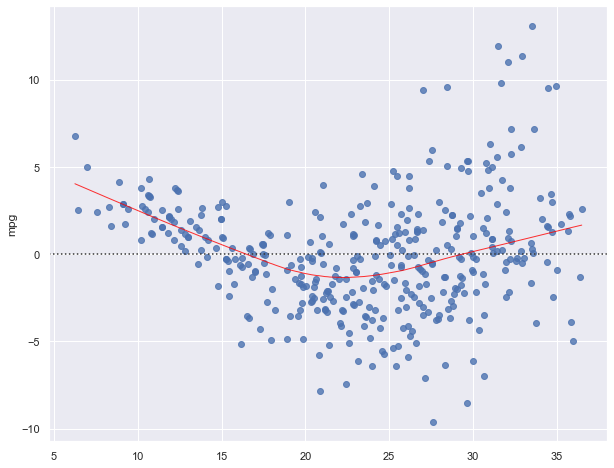

In [63]:
model_fitted_y = mlr.fittedvalues
# model residuals
# model_residuals = model_fit.resid
sns.residplot(model_fitted_y,'mpg',data=auto,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

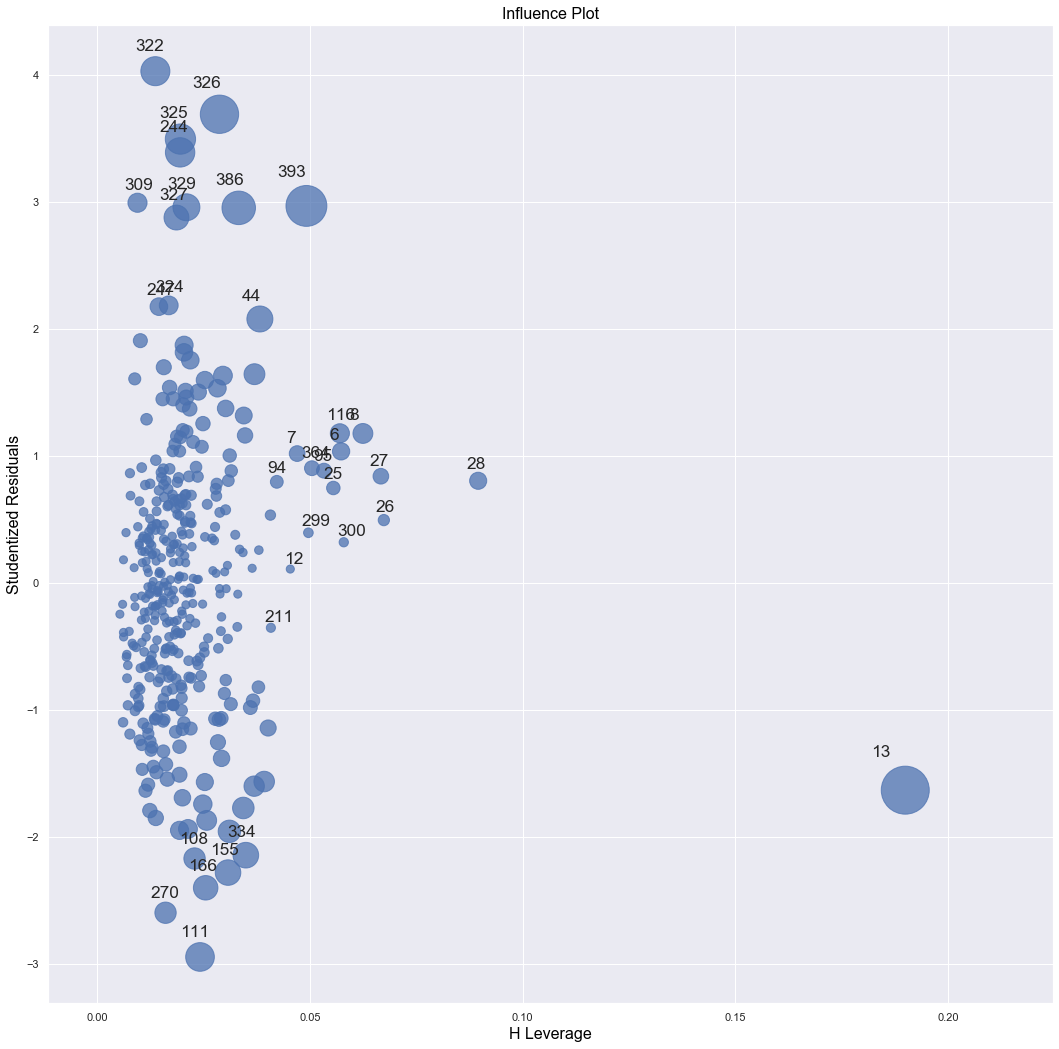

In [64]:
fig, ax = plt.subplots(figsize=(18,18))
fig = sm.graphics.influence_plot(mlr, ax=ax,criterion="cooks")

The plots show there is a mild non-linearity for the data. There are a new outliers and high leverage points.

In [66]:
model_f = 'mpg ~cylinders+\
                displacement+\
                horsepower+\
                weight+\
                acceleration+\
                year+\
                origin+\
                cylinders*displacement+\
                displacement*weight'
lrauto2 = smf.ols(formula=model_f, data=auto).fit()
ypred2 = lrauto2.predict()
lrauto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     258.2
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          2.04e-156
Time:                        12:55:04   Log-Likelihood:                -977.47
No. Observations:                 392   AIC:                             1975.
Df Residuals:                     382   BIC:                             2015.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.7953      4.515     -1.062      0.289     -13.672       4.081
cylinders                 -0.1091      0.597     -0.183      0.855      -1.282       1.064
displacement              -0.0719      0.014     -5.273      0.000      -0.099      -0.045
horsepower                -0.0346      0.013     -2.651      0.008      -0.060      -0.009
weight                    -0.0103      0.001     -9.680      0.000      -0.012      -0.008
acceleration               0.0662      0.088      0.751      0.453      -0.107       0.240
year                       0.7840      0.046     17.171      0.000       0.694       0.874
origin                     0.5475      0.264      2.071      0.039       0.028       1.067
cylinders:displacement     0.0012      0.003      0.437      0.663      -0.004       0.007
displacement:weight     2.141e-05   3.71e-06      5.768      0.000    1.41e-05    2.87e-05
==============================================================================
Omnibus:                       46.636   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.873
Skew:                           0.634   Prob(JB):                     7.56e-23
Kurtosis:                       5.151   Cond. No.                     2.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Heatmap and pair corr analysis shows cylinder,displacement and weight have strong correlation, so include the two interactions in the formula.
Result shows displacement and weight has significant interaction.

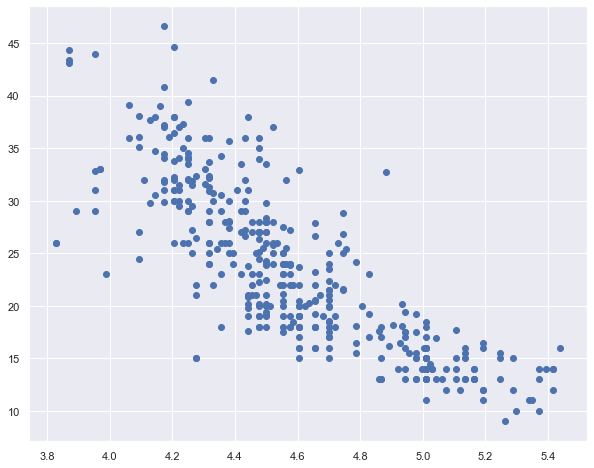

In [67]:
plt.scatter(np.log(auto['horsepower']),auto['mpg'])

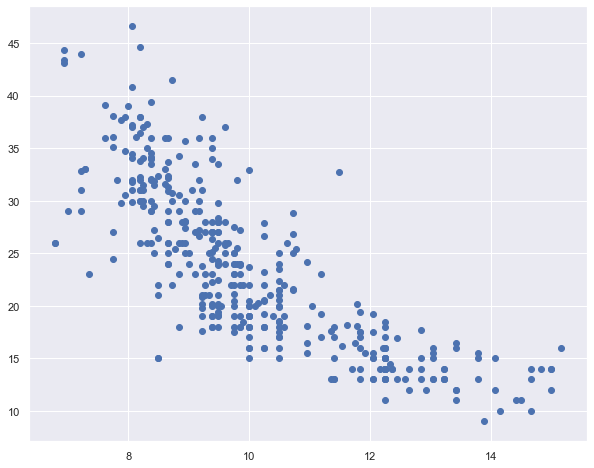

In [68]:
plt.scatter(np.sqrt(auto['horsepower']),auto['mpg'])

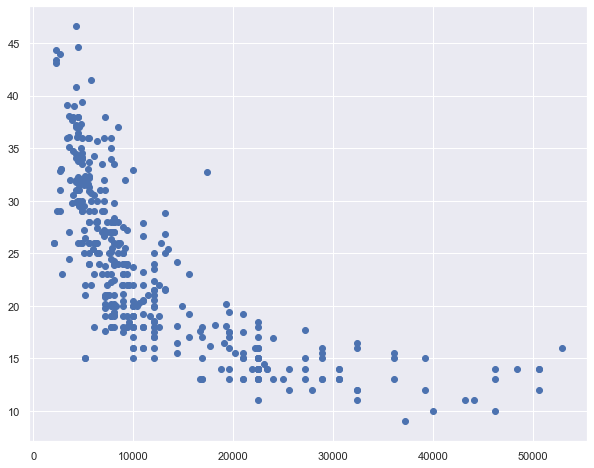

In [69]:
plt.scatter(np.square(auto['horsepower']),auto['mpg'])

Log(x) gives the most linear transformation.

In [70]:
carseats= pd.read_csv('data/Carseats.csv')

In [71]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
carseats.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [76]:
mlrcar = smf.ols(formula='Sales~ Price+Urban+US',data=carseats).fit()
mlrcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           2.39e-23
Time:                        13:10:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of the “Price” variable may be interpreted by saying that 
the average effect of a price increase of 1 dollar is a decrease of 54.4588492 units 
in sales all other predictors remaining fixed. The coefficient of the “Urban” variable 
may be interpreted by saying that on average the unit sales in urban location are 
21.9161508 units less than in rural location all other predictors remaining fixed. 
The coefficient of the “US” variable may be interpreted by saying that on average the 
unit sales in a US store are 1200.5726978 units more than in a non US store all other 
predictors remaining fixed.

In [77]:
mlrcar2 = smf.ols(formula='Sales~ Price+US',data=carseats).fit()
mlrcar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           2.66e-24
Time:                        13:19:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
mlrcar2.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


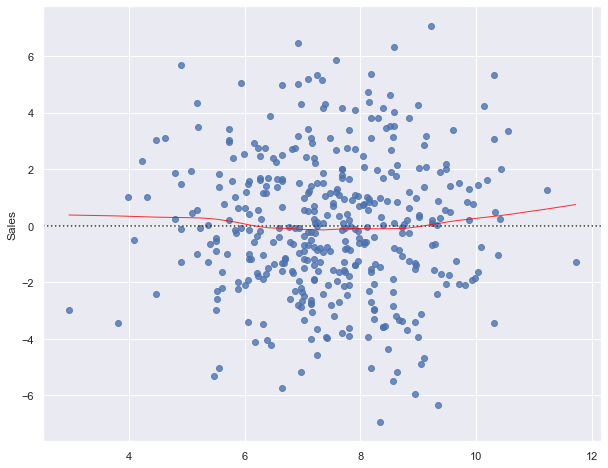

In [81]:
model_fitted_y = mlrcar.fittedvalues
# model residuals
# model_residuals = model_fit.resid
sns.residplot(model_fitted_y,'Sales',data=carseats,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

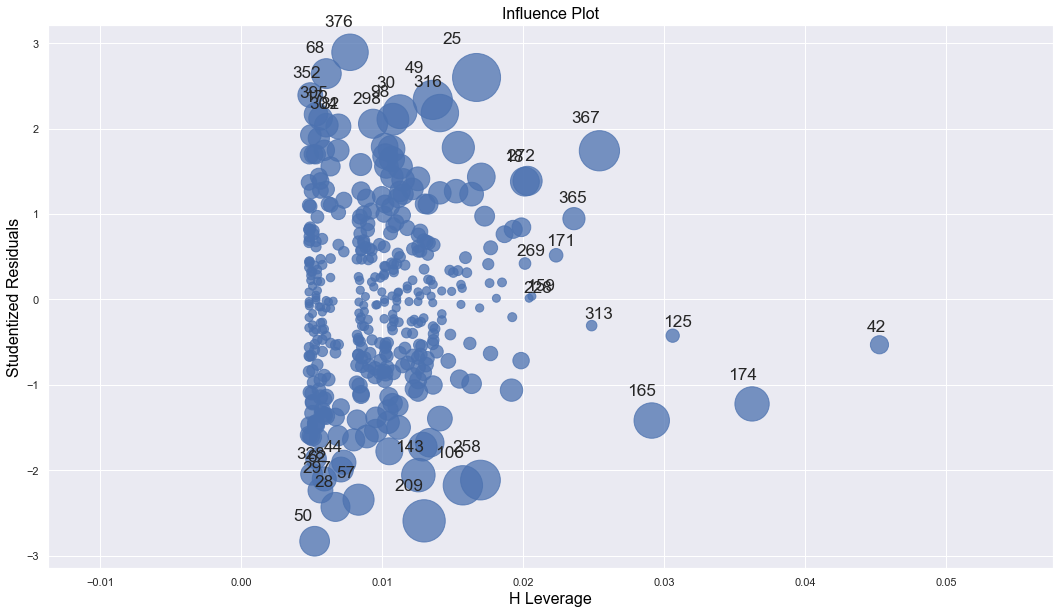

In [84]:
fig, ax = plt.subplots(figsize=(18,10))
fig = sm.graphics.influence_plot(mlrcar, ax=ax,criterion="cooks")

Using Random to generate normal distributed dataset. The data has some differences with the dataset generated in R. 

set.seed(1)
x=rnorm(100)
y=2*x +rnorm(100)

In [117]:
random.seed(1)
x = np.random.normal(size=100)
y = 2*x +np.random.normal(size=100)
df = pd.DataFrame({'x':x,'y':y})

In [130]:
#without intercept by adding -1 in the formula
randomlr = smf.ols(formula='y~x-1',data=df).fit()
# randomlr = smf.ols(formula='x~y-1',data=df).fit()
print(randomlr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.336e+04
Date:                Thu, 27 Feb 2020   Prob (F-statistic):                   1.26e-132
Time:                        14:39:13   Log-Likelihood:                          96.255
No. Observations:                 100   AIC:                                     -190.5
Df Residuals:                      99   BIC:                                     -187.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Generate a dataset that x~y vs y~x has diff t-Statistics

In [134]:
random.seed(1)
x = np.random.normal(size=100)
y = 2*x +np.random.normal(size=100,scale=0.01)
df = pd.DataFrame({'x':x,'y':y})

randomlr = smf.ols(formula='y~x-1',data=df).fit()
# randomlr = smf.ols(formula='x~y-1',data=df).fit()
print(randomlr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.197e+06
Date:                Thu, 27 Feb 2020   Prob (F-statistic):                   7.12e-231
Time:                        14:39:54   Log-Likelihood:                          325.72
No. Observations:                 100   AIC:                                     -649.4
Df Residuals:                      99   BIC:                                     -646.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------